In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score

In [2]:
# Reading the dataset
df = pd.read_parquet('data/final_data/final_dataset.parquet')

# Replacing NaN values with 0
df = df.fillna(0)

In [3]:
df.head()



,date,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca,target
0,2010-02-14,0.0,36,13,20.52,136.0,3.619512,0.190574,0
1,2010-02-15,0.0,41,7,20.51,129.0,3.470118,0.209177,0
2,2010-02-16,0.0,43,8,20.51,130.0,3.433721,0.197542,0
3,2010-02-17,0.0,51,10,20.51,132.0,3.351107,0.135033,0
4,2010-02-18,0.0,51,16,20.50,135.0,3.238121,0.107690,0


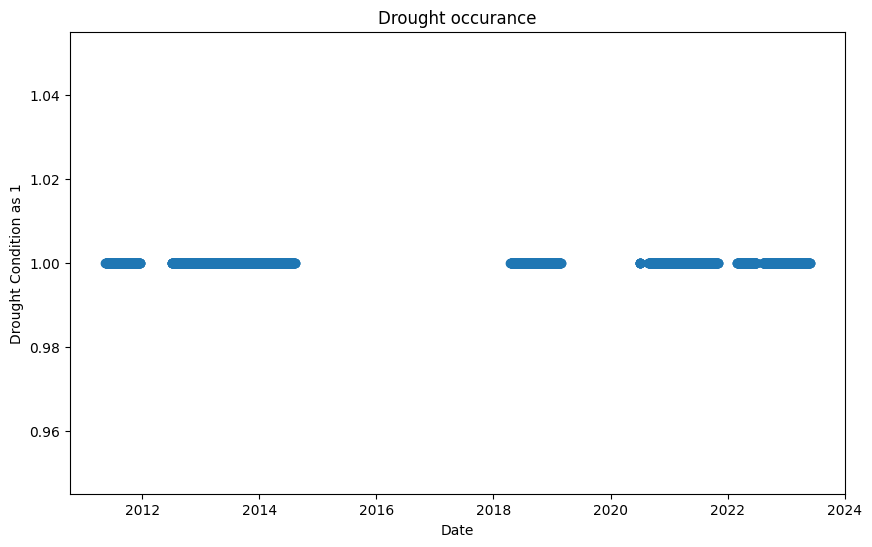

In [4]:
# Visualizing where target variable is 1 i.e there is drought

plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 1]['date'], df[df['target'] == 1]['target'])
plt.title('Drought occurance')
plt.xlabel('Date')
plt.ylabel('Drought Condition as 1')
plt.show()


In [5]:
# following are the features list

features = ['precip', 'max_temp', 'min_temp', 'gwl', 'daily_discharge_cfs','sm_pca', 'st_pca']
target = 'target'

In [6]:
# Checking for multicollinearity between features

corr = df[features].corr()
corr.style.background_gradient(cmap='coolwarm')


,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
precip,1.000000,-0.032593,0.104749,-0.024576,0.206089,-0.024596,-0.001298
max_temp,-0.032593,1.000000,0.861268,0.063881,0.010227,-0.390845,-0.302978
min_temp,0.104749,0.861268,1.000000,0.046226,0.101598,-0.406750,-0.333921
gwl,-0.024576,0.063881,0.046226,1.000000,-0.056801,0.019720,-0.452011
daily_discharge_cfs,0.206089,0.010227,0.101598,-0.056801,1.000000,0.024787,0.018521
sm_pca,-0.024596,-0.390845,-0.406750,0.019720,0.024787,1.000000,0.312463
st_pca,-0.001298,-0.302978,-0.333921,-0.452011,0.018521,0.312463,1.000000


We can see that there is correlation between max_temp and min_temp, but as per the domain knowledge, we know that these two features are important and we should keep them

In [7]:
# Displaying the data before splitting

display(df[features].head())

display(df[[target]].head())

,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
0,0.0,36,13,20.52,136.0,3.619512,0.190574
1,0.0,41,7,20.51,129.0,3.470118,0.209177
2,0.0,43,8,20.51,130.0,3.433721,0.197542
3,0.0,51,10,20.51,132.0,3.351107,0.135033
4,0.0,51,16,20.50,135.0,3.238121,0.107690


,target
0,0
1,0
2,0
3,0
4,0


In [8]:
# Splitting the dataset into the Training set and Test set and Validation set

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.15, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [9]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts())

# No. of instance with 1 in target variable for test set
display(y_test.value_counts())

target
0    1884
1    1434
Name: count, dtype: int64

target
0    399
1    334
Name: count, dtype: int64

In [10]:
# display the data after splitting

# Training set
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(y_train).head())

# Test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())


,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
3187,0.00,65,21,21.39,132.0,0.611336,0.907899
1189,0.03,85,61,20.87,29.3,-0.408119,2.194220
4566,0.05,22,6,22.23,76.6,1.121847,-0.481679
4310,0.06,18,7,21.76,81.3,0.539386,2.331650
4321,0.00,64,31,21.71,77.0,1.582602,1.921310


,target
3187,1
1189,1
4566,1
4310,0
4321,1


,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
2857,0.01,47,22,21.16,170.0,2.224886,2.490720
2373,0.00,75,30,21.73,100.0,0.893778,-1.718663
1065,0.00,48,17,21.00,78.3,0.303675,0.066434
2287,0.00,97,60,21.31,112.0,-0.647494,-0.541322
1675,0.00,80,42,21.45,163.0,-0.127969,-1.816134


,target
2857,0
2373,0
1065,1
2287,0
1675,0


In [11]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [12]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3,4,5,6
0,-0.235013,-0.302859,-0.913856,0.112534,-0.077808,0.478475,0.532062
1,-0.009515,0.687420,1.260798,-1.088586,-0.466619,-0.260108,1.294874
2,0.140817,-2.431959,-1.729352,2.052803,-0.287546,0.848334,-0.291984
3,0.215984,-2.630015,-1.674985,0.967176,-0.269753,0.426348,1.376373
4,-0.235013,-0.352373,-0.370193,0.851684,-0.286032,1.182146,1.133033


In [14]:
# Implementing a simple feed forward neural network

# Initializing the ANN
model = keras.Sequential()

# Adding the input layer and the first hidden layer
model.add(keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the output layer
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 50)

# Scaling the test set
X_test_ = sc.transform(X_test)

# Predicting the Test set results
y_pred = model.predict(X_test_)

Epoch 1/50
332/332 [==============================] - 2s 5ms/step - loss: 0.7565 - accuracy: 0.4861
Epoch 2/50
332/332 [==============================] - 2s 5ms/step - loss: 0.6715 - accuracy: 0.5539
Epoch 3/50
332/332 [==============================] - 1s 4ms/step - loss: 0.6536 - accuracy: 0.5910
Epoch 4/50
332/332 [==============================] - 1s 4ms/step - loss: 0.6494 - accuracy: 0.5913
Epoch 5/50
332/332 [==============================] - 1s 4ms/step - loss: 0.6482 - accuracy: 0.5967
Epoch 6/50
332/332 [==============================] - 2s 5ms/step - loss: 0.6478 - accuracy: 0.5916
Epoch 7/50
332/332 [==============================] - 1s 5ms/step - loss: 0.6472 - accuracy: 0.5898
Epoch 8/50
332/332 [==============================] - 1s 5ms/step - loss: 0.6471 - accuracy: 0.5868
Epoch 9/50
332/332 [==============================] - 1s 4ms/step - loss: 0.6470 - accuracy: 0.5904
Epoch 10/50
332/332 [==============================] - 1s 4ms/step - loss: 0.6470 - accuracy: 0.5850

Accuracy: 0.5566166439290586


F1 Score: 0.45742904841402343
Recall Score: 0.4101796407185629


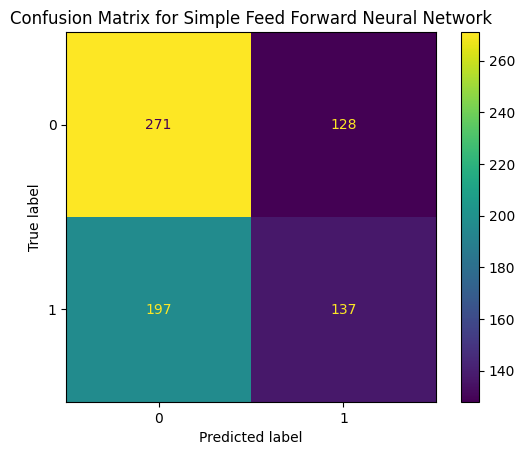

In [15]:
# Generating the confusion matrix for the model


y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Simple Feed Forward Neural Network')

# Accuracy, F1 Score and Recall Score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

### Model Optimization

In [13]:
# Model Optimization

X_val_ = sc.transform(X_val)

def create_model(act_function, neurons, f, bs):
    

    model = keras.Sequential()
    model.add(keras.layers.Dense(units = neurons, activation = act_function, input_shape = (7,), kernel_initializer = tf.keras.initializers.LecunNormal()))
    model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

    optimiser = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.0001, clipnorm=True)
    model.compile(optimizer = optimiser, loss = 'binary_crossentropy', metrics = 'accuracy', )

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=3, restore_best_weights=True)
    rlrnop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=f, patience=1, verbose=1)

    log = model.fit(X_train, y_train, validation_data=(X_val_, y_val), epochs=150, batch_size=bs, callbacks=[es, rlrnop], verbose=0)

    loss = log.history['loss']
    val_loss = log.history['val_loss']
    
    plt.figure(figsize=(15, 6))
    # Plot Training Loss
    plt.plot(loss, label='Training loss', color='blue')
    plt.plot(val_loss, label='Validation loss', color='red')
    plt.title('Training and Validation Loss for act_function={},Neurons={}, Factor Size ={}, Batch Size={}'.format(act_function, neurons, f, bs))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    

    return model, log

2024-05-04 21:58:26.485142: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-04 21:58:26.485169: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-04 21:58:26.485182: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-04 21:58:26.485227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-04 21:58:26.485246: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-04 21:58:27.033314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-05-04 21:58:27.062754: E te


Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 17: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 19: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 20: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 21: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 22: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 23: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 24: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.
Restoring model weights from the end of the best epoch: 22.

Epoch 25: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Epoch 25: early stopping


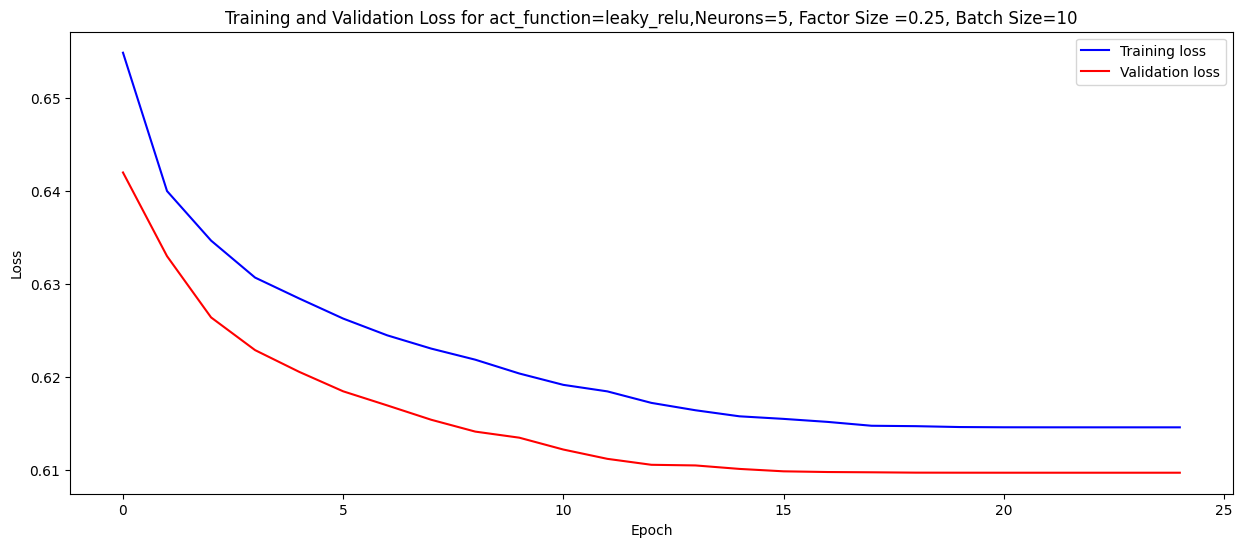


Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 103: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 108: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 110: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 112: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 113: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 114: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 115: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 116: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 117: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 118: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 119: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 120: ReduceLROnPlateau reducing learning r

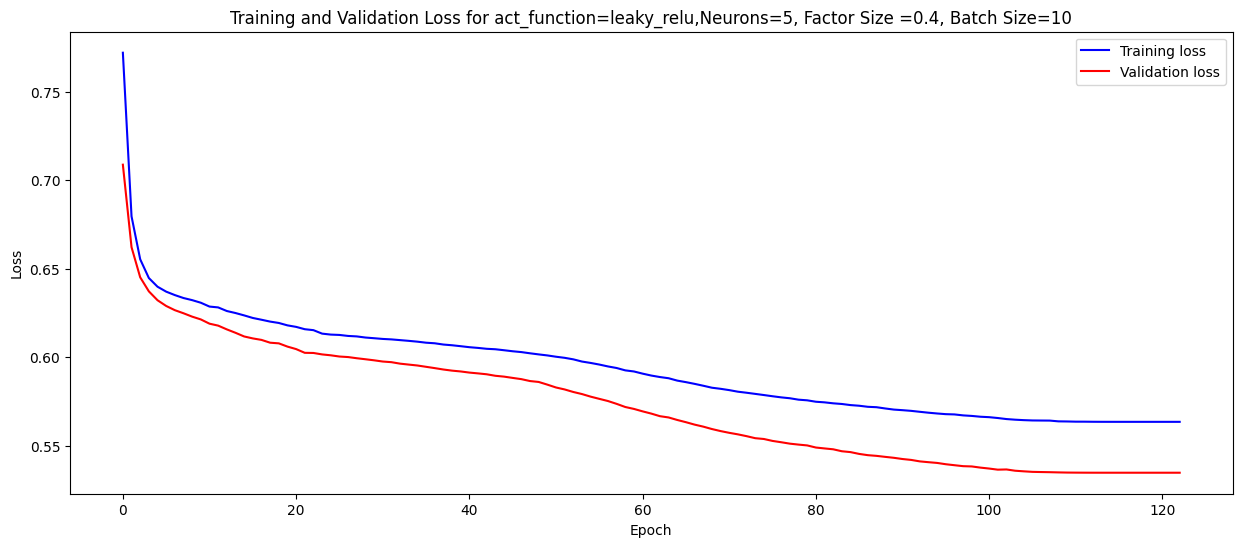

2024-05-04 22:02:42.809246: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 60: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 65: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 67: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 69: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 70: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 71: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 72: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 73: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 74: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 75: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 76: ReduceLROnPlateau reducing learning rate to 1.22070

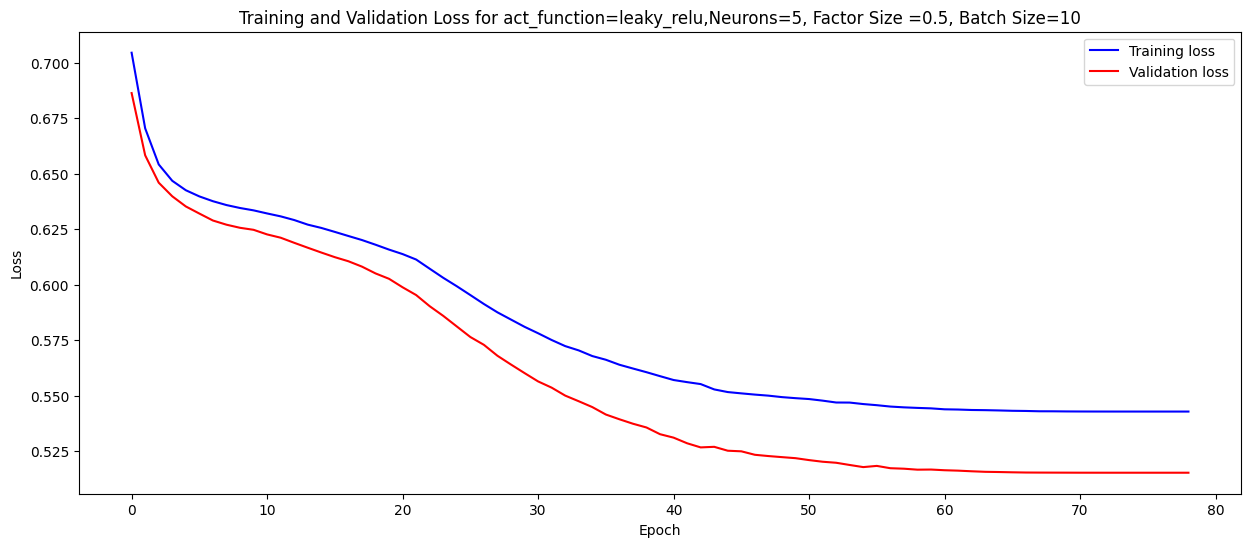

2024-05-04 22:05:03.076755: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 55: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 65: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 67: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 68: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 69: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 70: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 71: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 72: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 73: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Restoring model weights from the end of the best epoch: 71.

Epoch 74: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Epoch 74: early stopping


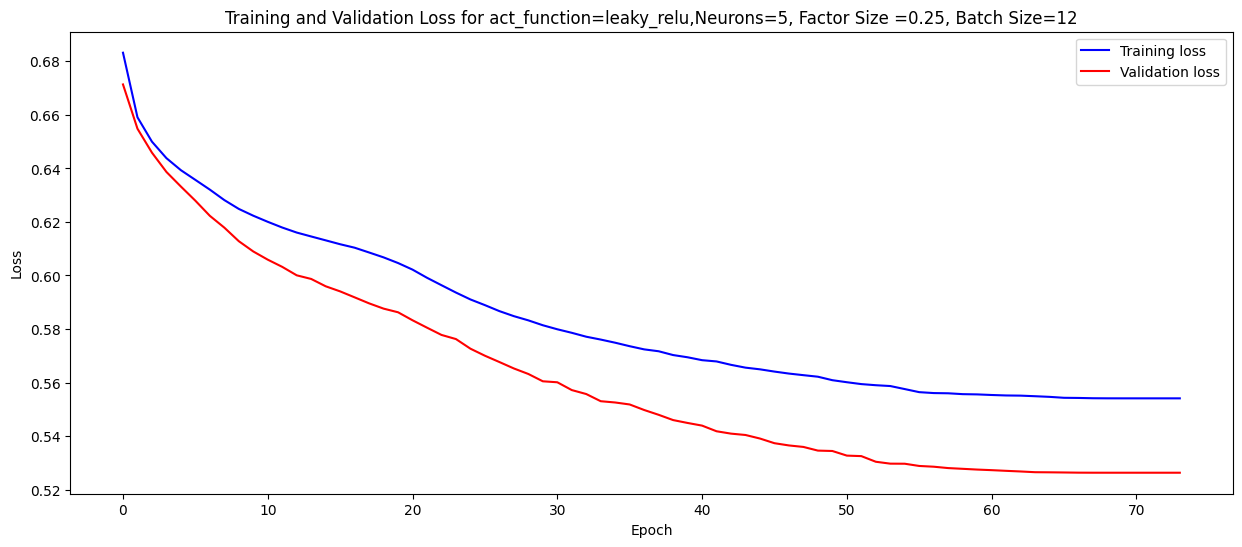

2024-05-04 22:06:56.734176: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 72: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 81: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 83: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 85: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 86: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 87: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 88: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 89: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 90: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 91: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 92: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 93: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 94: ReduceLROnPlateau reducing learning rate to 6.710

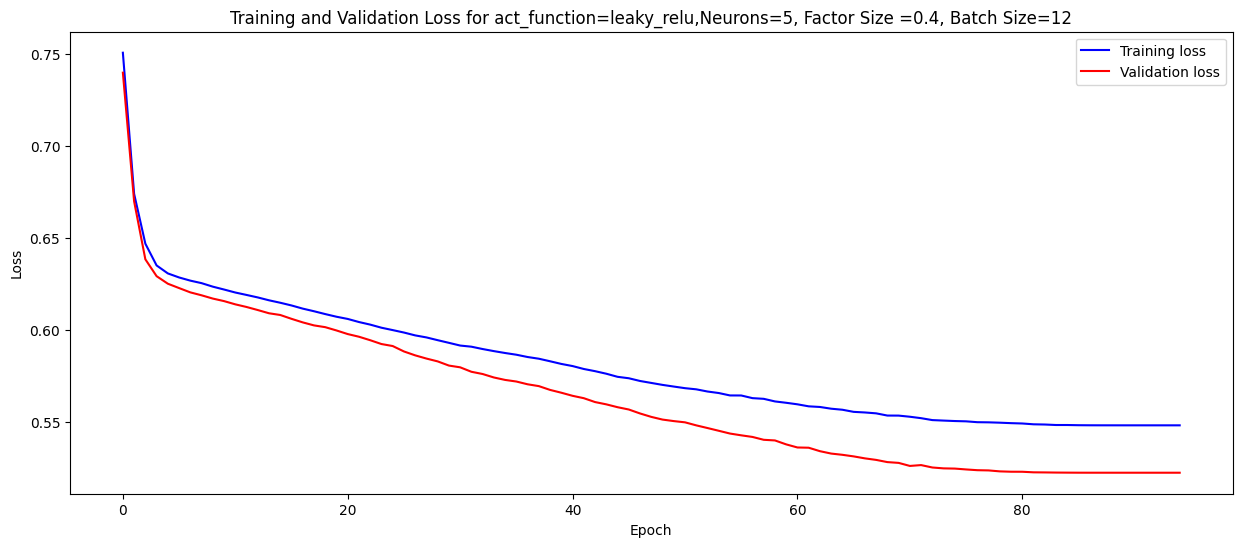

2024-05-04 22:09:18.995090: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 69: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 73: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 76: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 78: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 79: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 80: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 81: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 82: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 83: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 84: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 85: ReduceLROnPlateau reducing learning rate to 1.22070

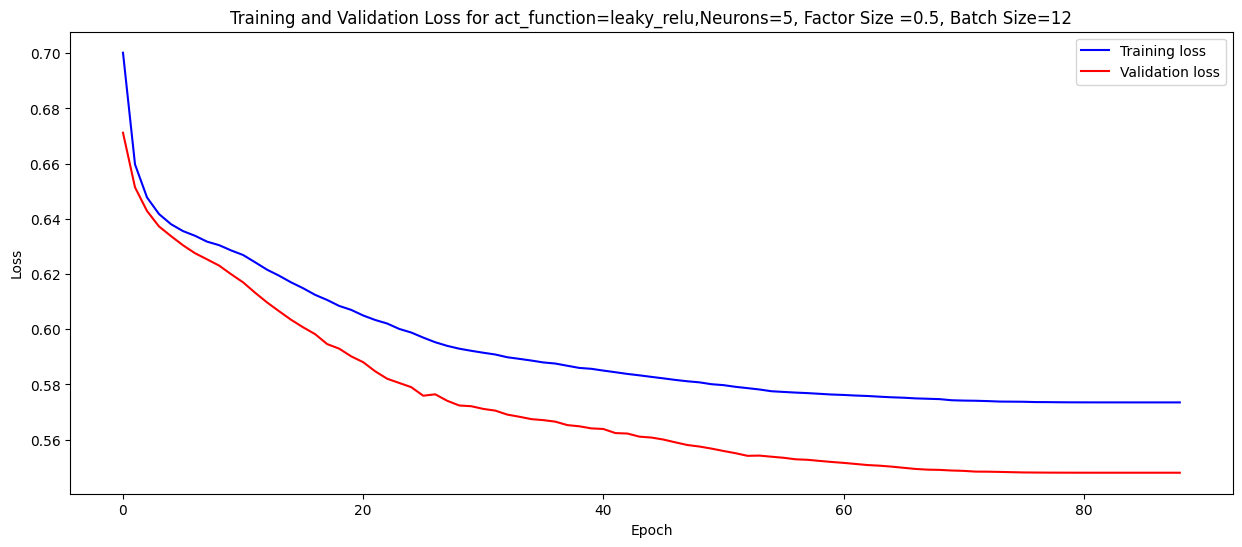

2024-05-04 22:11:32.339714: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 47: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 49: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 50: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 51: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 52: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 53: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 54: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 55: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 56: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Restoring model weights from the end of the best epoch: 54.

Epoch 57: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 57: early stopping


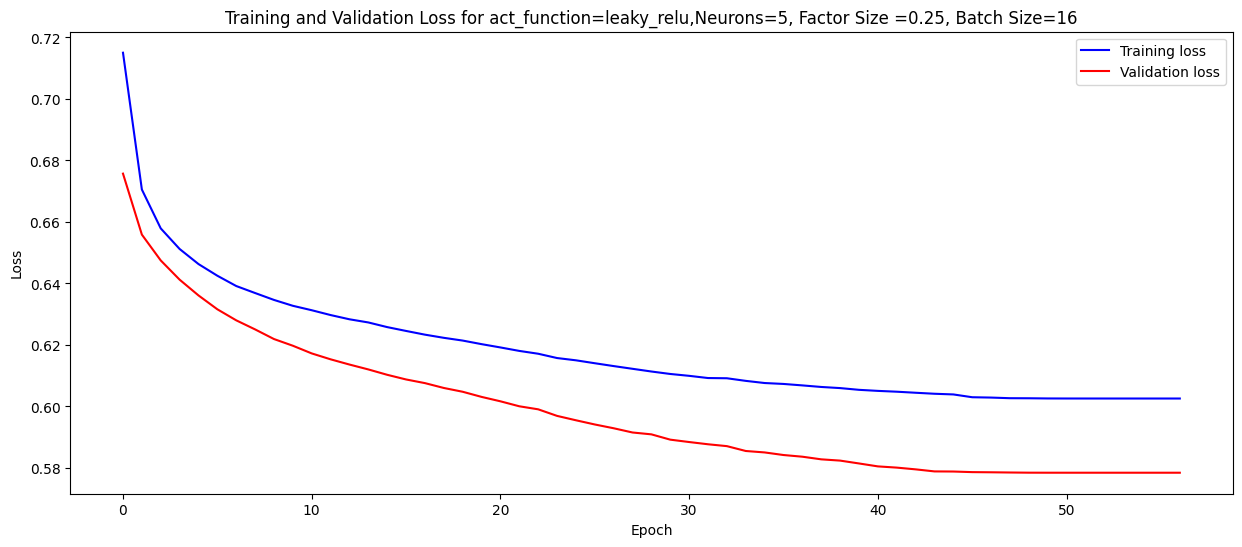


Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 69: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 71: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 72: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 73: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 74: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 75: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 76: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 77: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 78: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 79: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.
Restoring model weights from the end of the best epoch: 77.


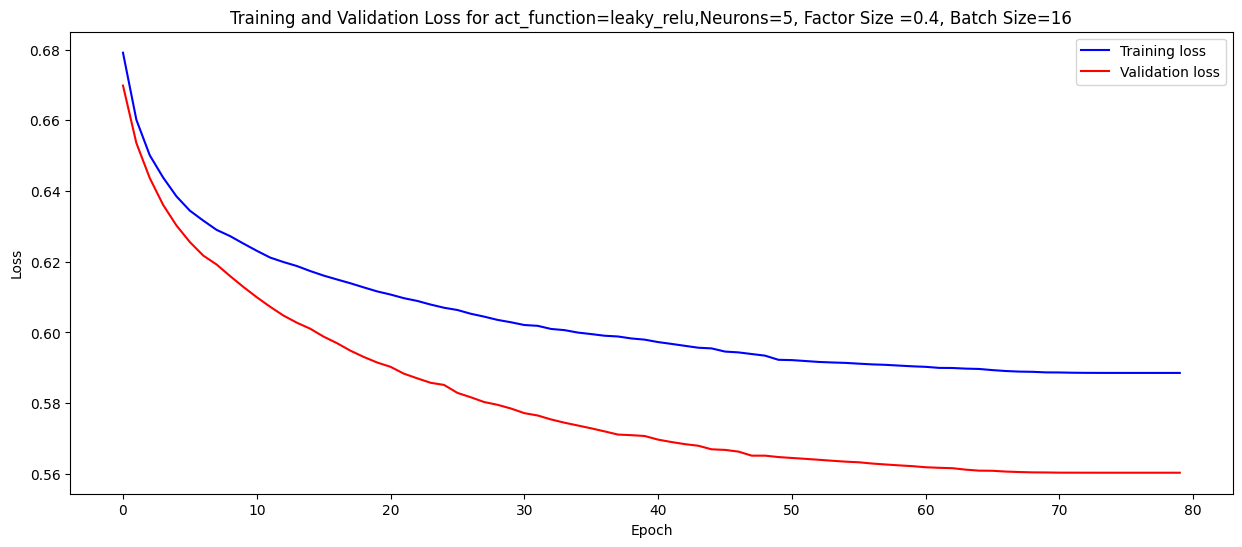

2024-05-04 22:14:02.724539: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 69: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 93: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 97: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 99: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 100: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 101: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 102: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 103: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 104: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 105: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 106: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 107: ReduceLROnPlateau reducing learning rate to

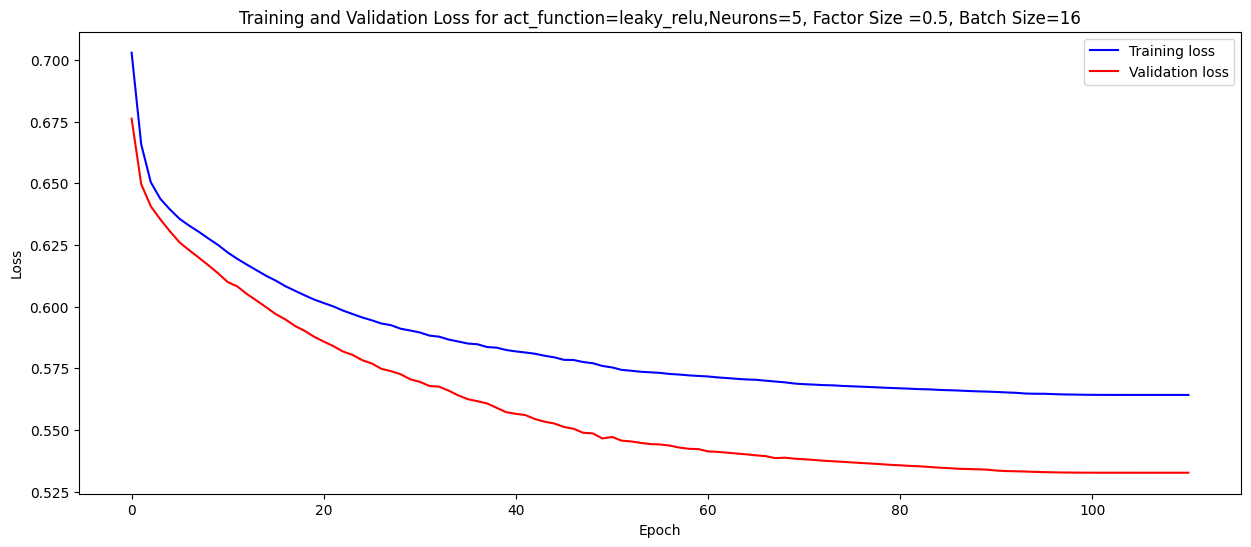

2024-05-04 22:16:01.804685: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 43: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 45: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 47: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 48: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 49: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 50: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 51: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 52: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 53: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Restoring model weights from the end of the best epoch: 51.

Epoch 54: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 54: early stopping


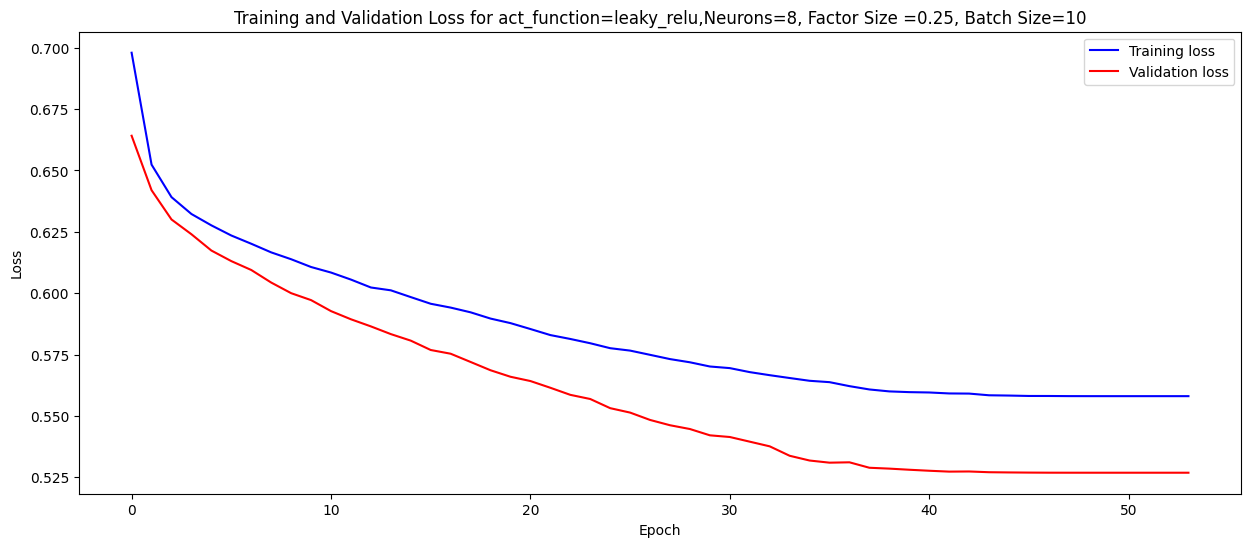

2024-05-04 22:17:39.258936: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 62: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 65: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 71: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 73: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 74: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 76: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 77: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 78: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 79: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 80: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 81: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 82: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 83: ReduceLROnPlateau reducing learning rate to 6.710

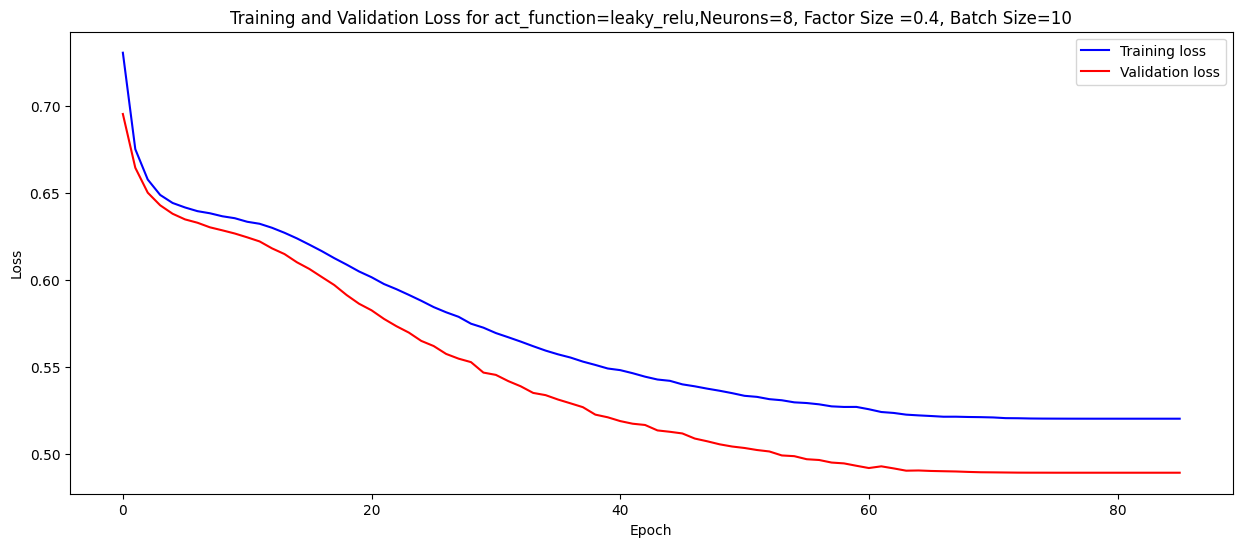

2024-05-04 22:20:13.160208: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 55: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 57: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 60: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 61: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 63: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 64: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 65: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 66: ReduceLROnPlateau reducing learning rate to 1.22070

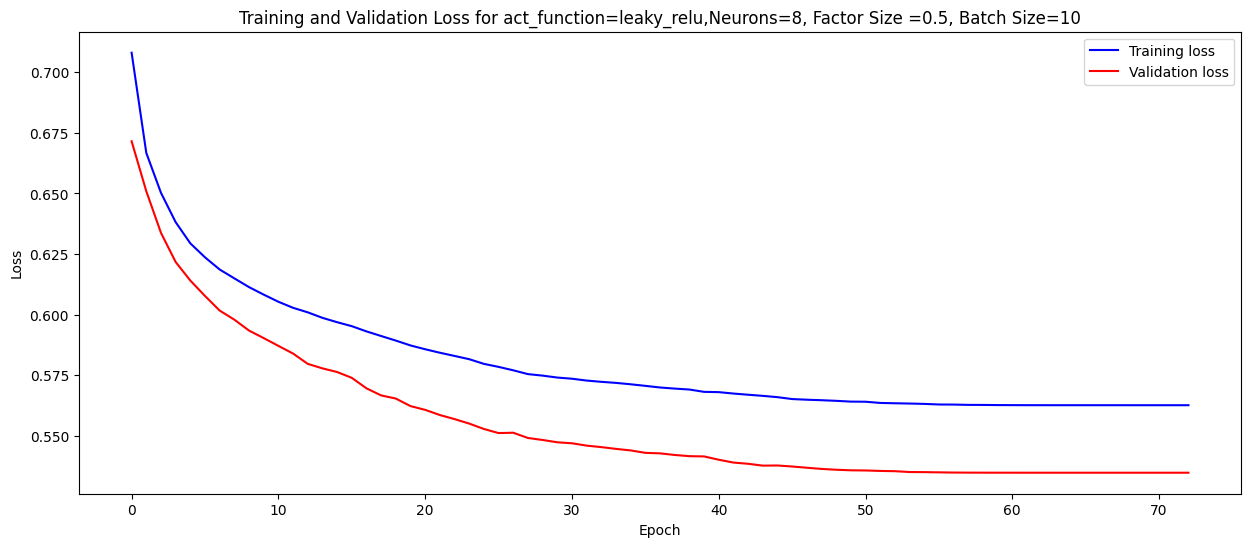

2024-05-04 22:22:23.923991: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 48: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Restoring model weights from the end of the best epoch: 46.

Epoch 49: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 49: early stopping


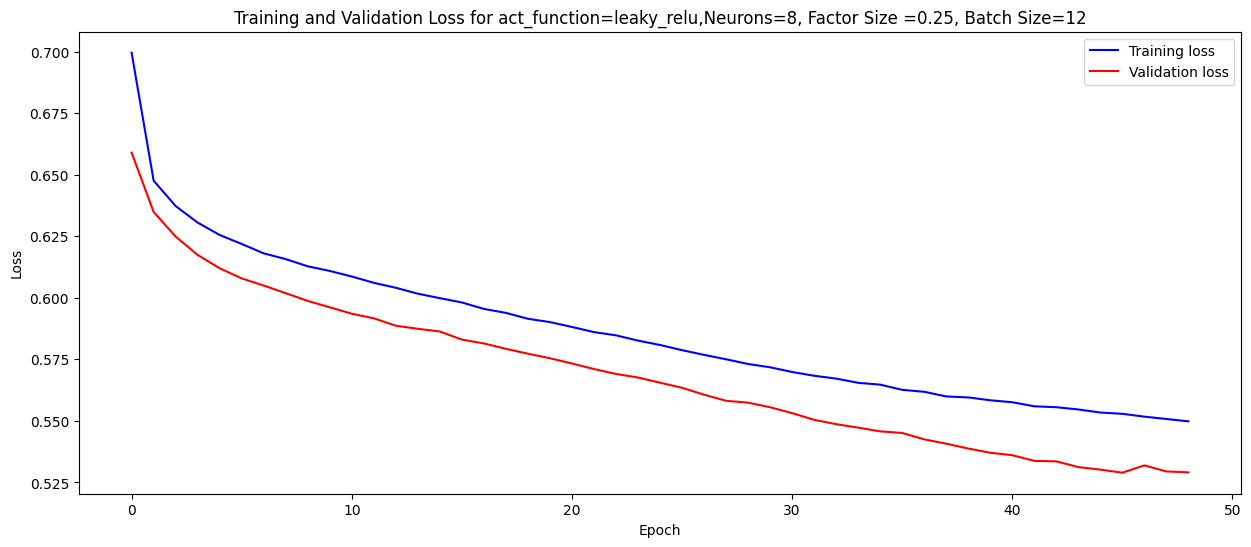

2024-05-04 22:23:40.354111: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 53: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 60: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 65: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 67: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 68: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 70: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 71: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 72: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 73: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 74: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 75: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 76: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.
Restoring model weights from the end of the best epoch: 74.


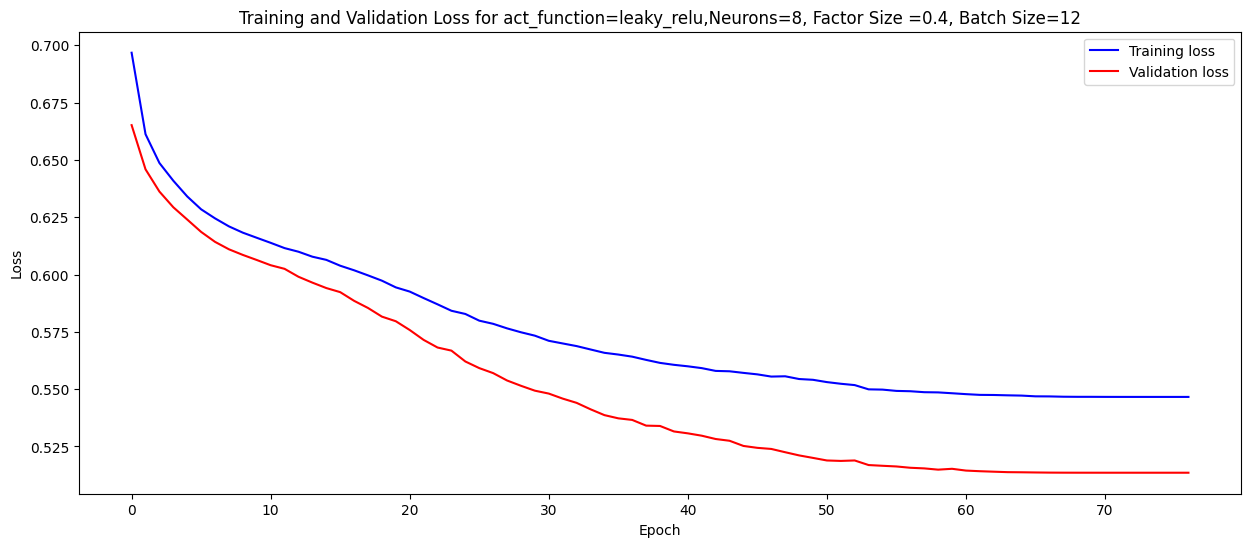

2024-05-04 22:25:37.897592: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 92: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 96: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 98: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 100: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 101: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 102: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 103: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 104: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 105: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 106: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 107: ReduceLROnPlateau reducing learning rate to

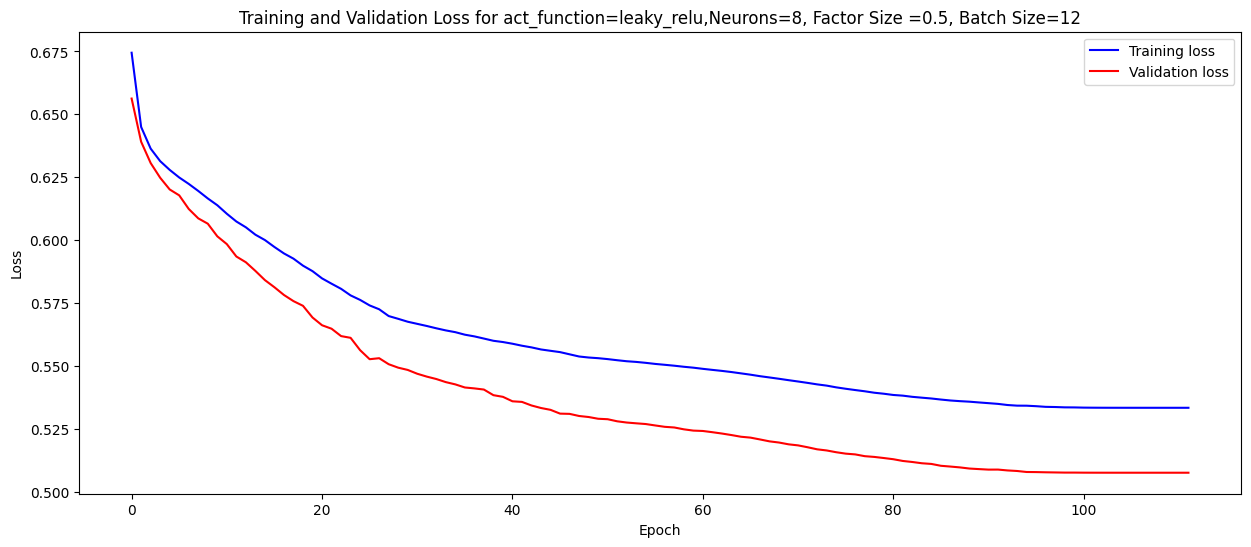

2024-05-04 22:28:31.884062: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 74: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 78: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 80: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 81: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 82: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 83: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 84: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 85: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 86: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Restoring model weights from the end of the best epoch: 84.

Epoch 87: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 87: early stopping


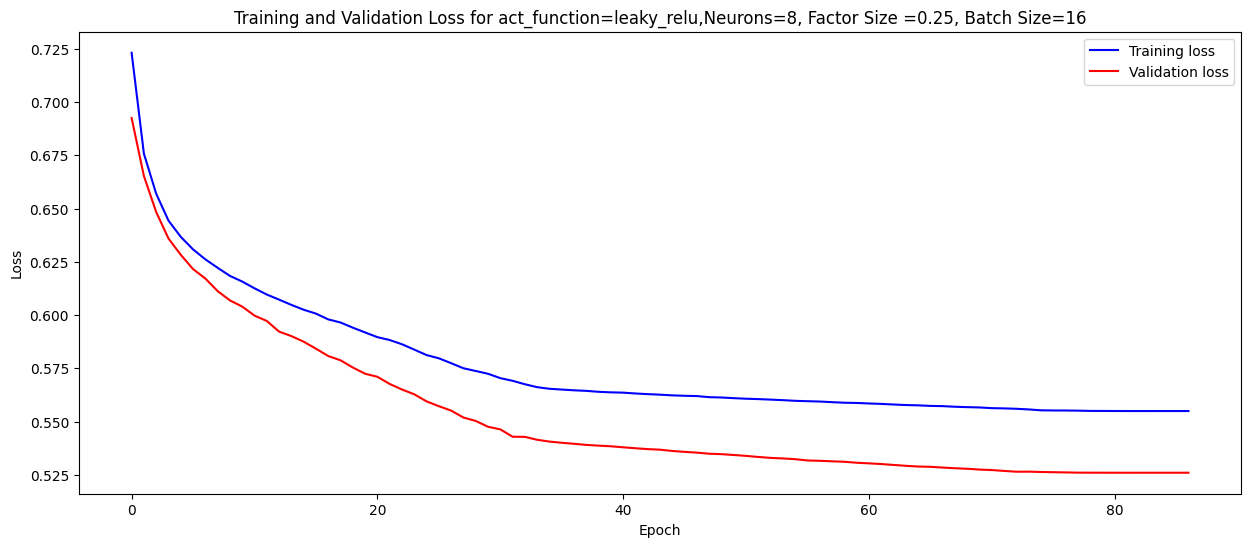

2024-05-04 22:30:11.147989: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 52: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 55: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 56: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 57: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 58: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 59: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 60: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 61: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 62: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 63: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 64: ReduceLROnPlateau reducing learning rate to 6.710

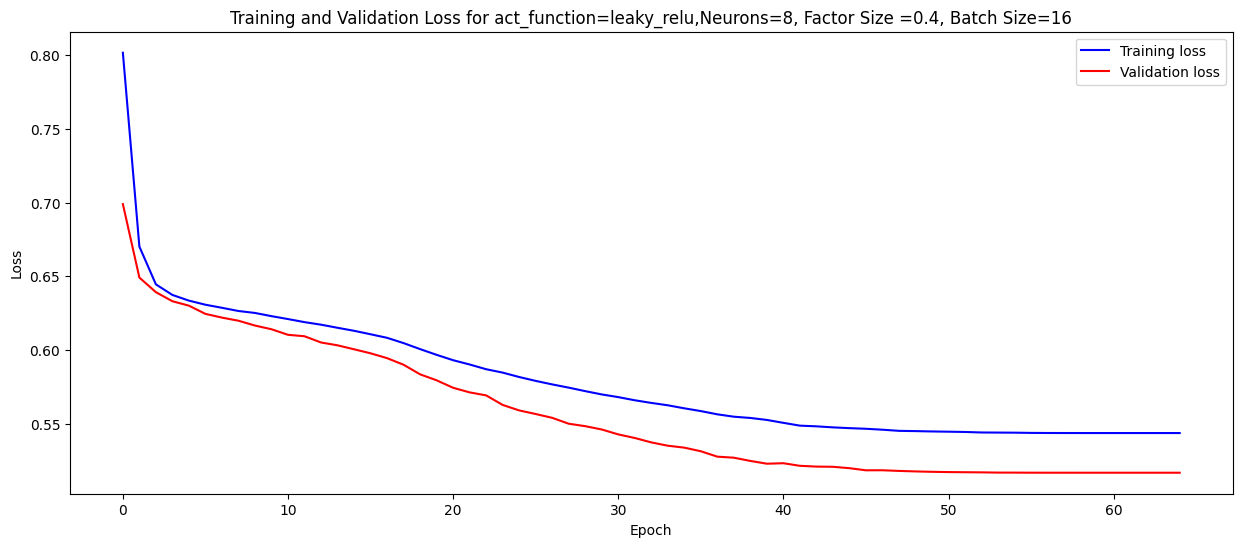

2024-05-04 22:31:23.079854: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 56: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 57: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 60: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 61: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 63: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 64: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 65: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 66: ReduceLROnPlateau reducing learning rate to 1.22070

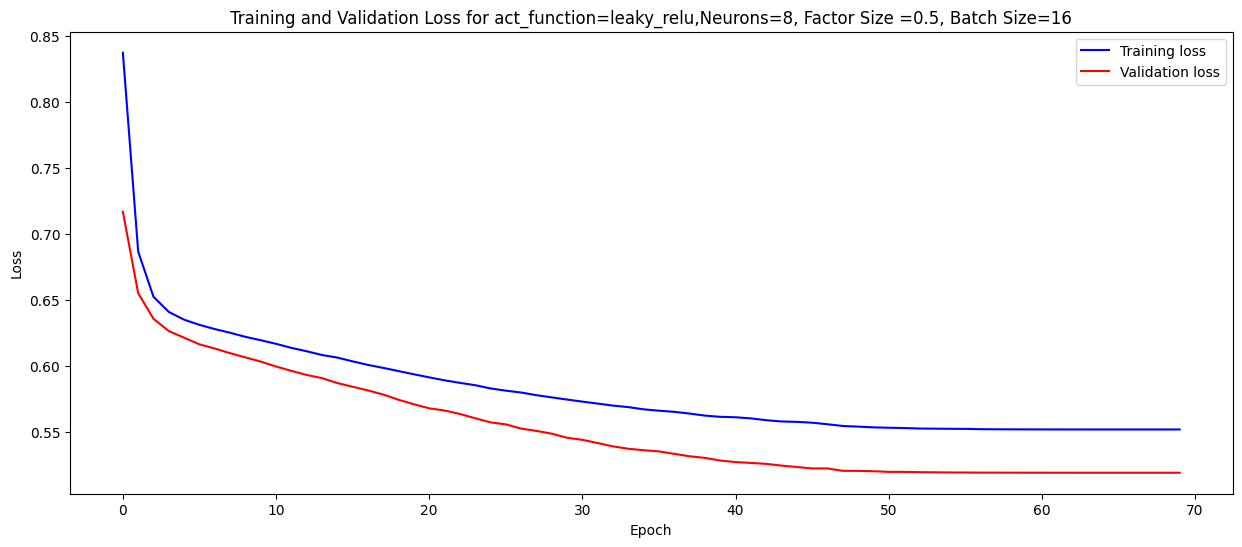

2024-05-04 22:32:41.230545: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 40: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 44: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 46: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 47: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 48: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 49: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 50: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 51: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 52: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Restoring model weights from the end of the best epoch: 50.

Epoch 53: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 53: early stopping


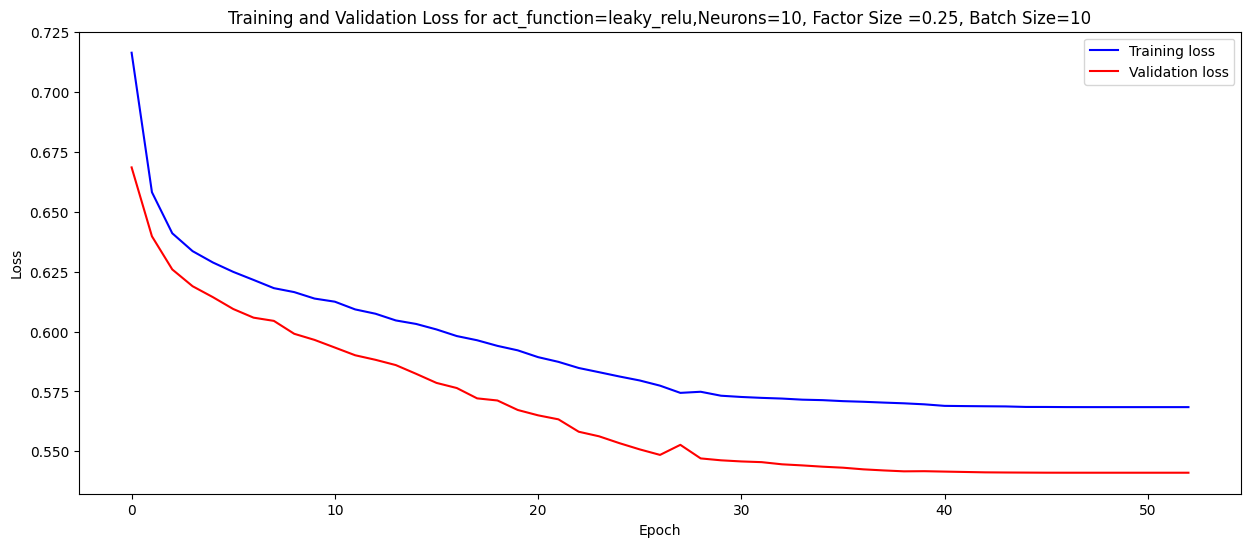

2024-05-04 22:34:15.564541: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 51: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 52: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 54: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 55: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 56: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 57: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 58: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 60: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 61: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.
Restoring model weights from the end of the best epoch: 59.


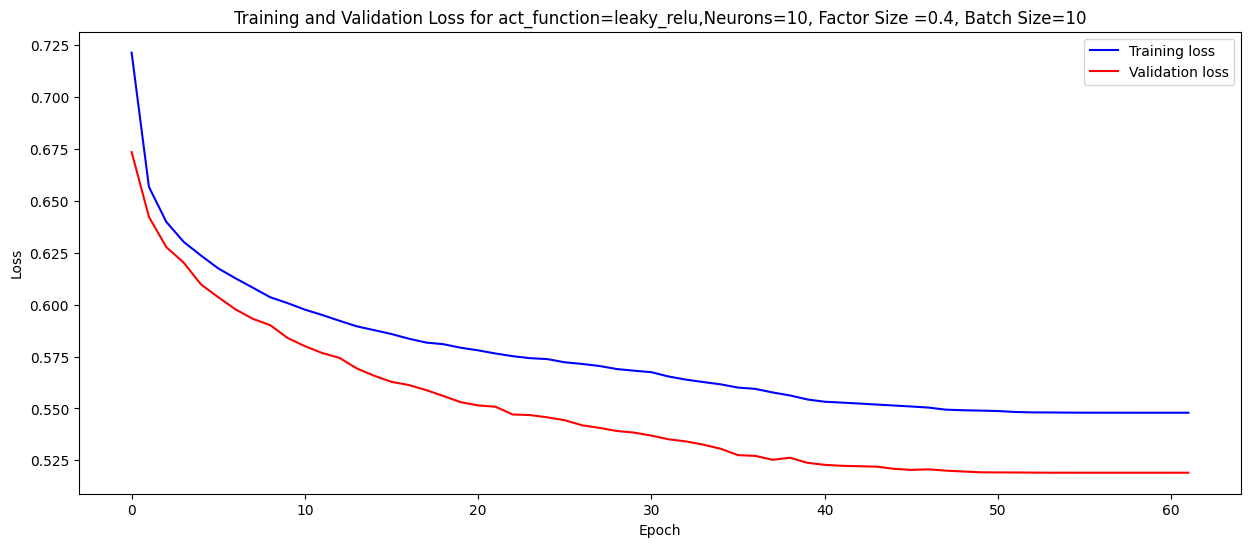

2024-05-04 22:36:04.788886: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 48: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 50: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 52: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 53: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 54: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 55: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 56: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 57: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 58: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.22070

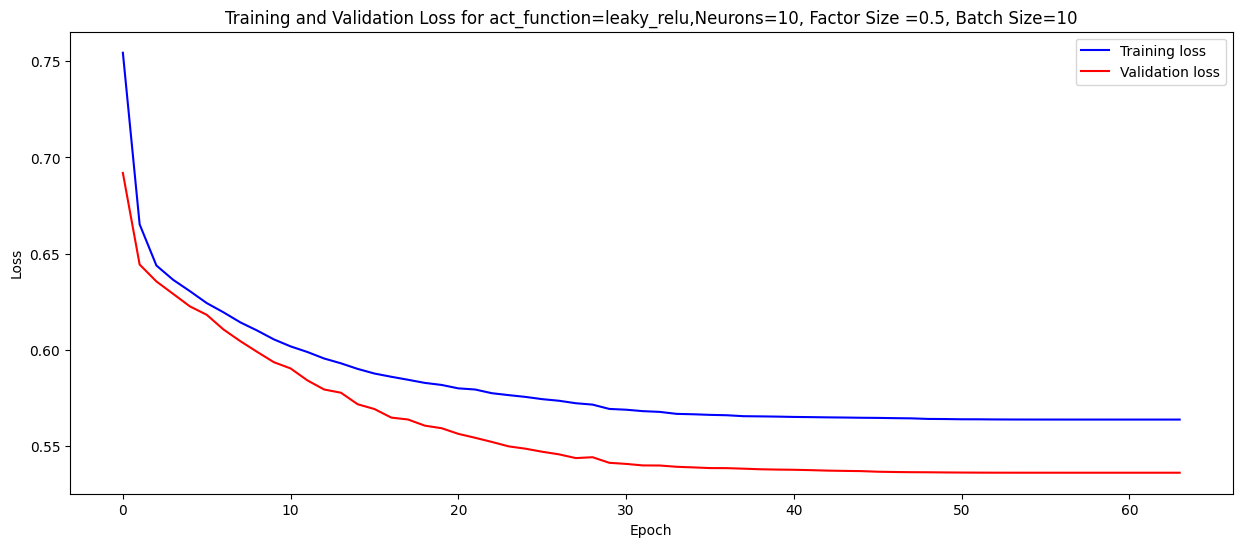

2024-05-04 22:37:55.452199: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 42: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 52: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 53: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 55: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 56: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 57: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 58: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 59: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Restoring model weights from the end of the best epoch: 57.

Epoch 60: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Epoch 60: early stopping


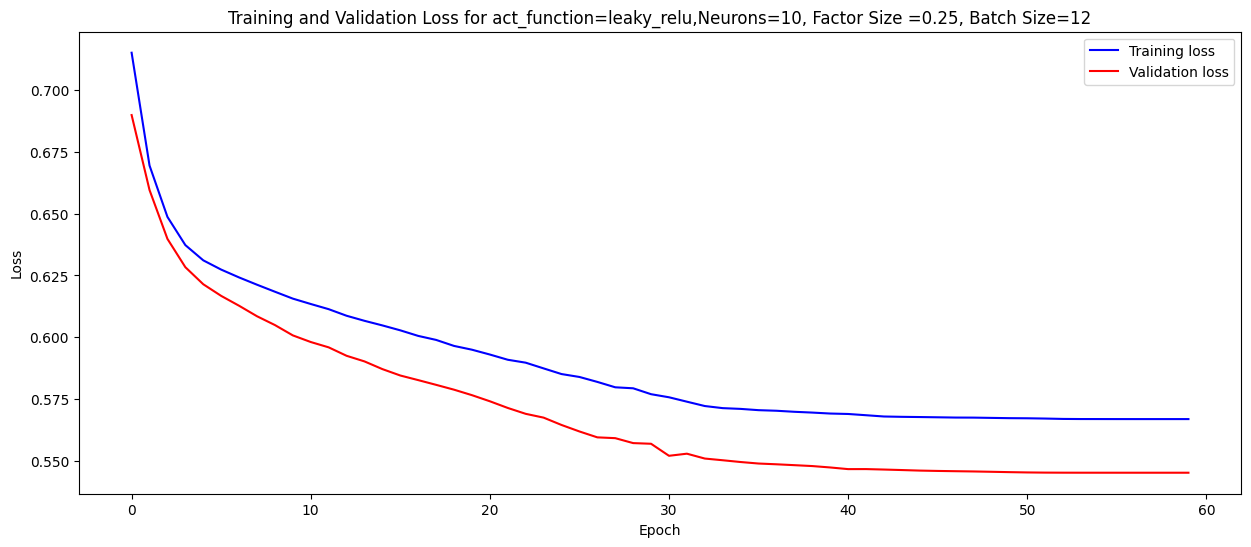

2024-05-04 22:39:28.197295: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 50: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 52: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 55: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 57: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 58: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 60: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 61: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 62: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 63: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 64: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 65: ReduceLROnPlateau reducing learning rate to 6.710

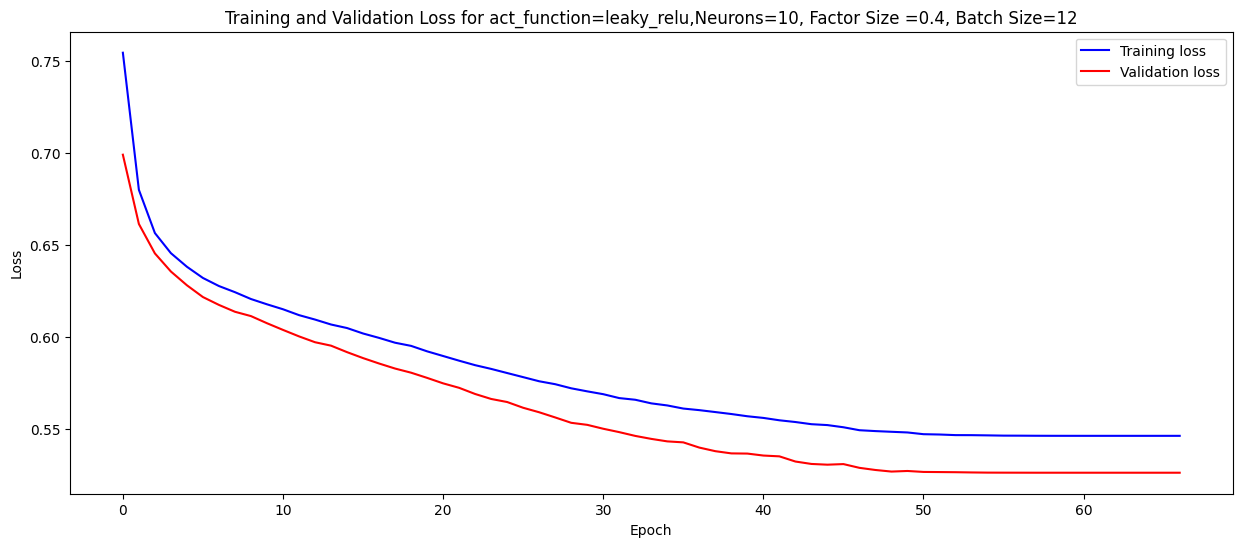

2024-05-04 22:41:09.794467: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 56: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 58: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 61: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 63: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 64: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 65: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 66: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 67: ReduceLROnPlateau reducing learning rate to 1.22070

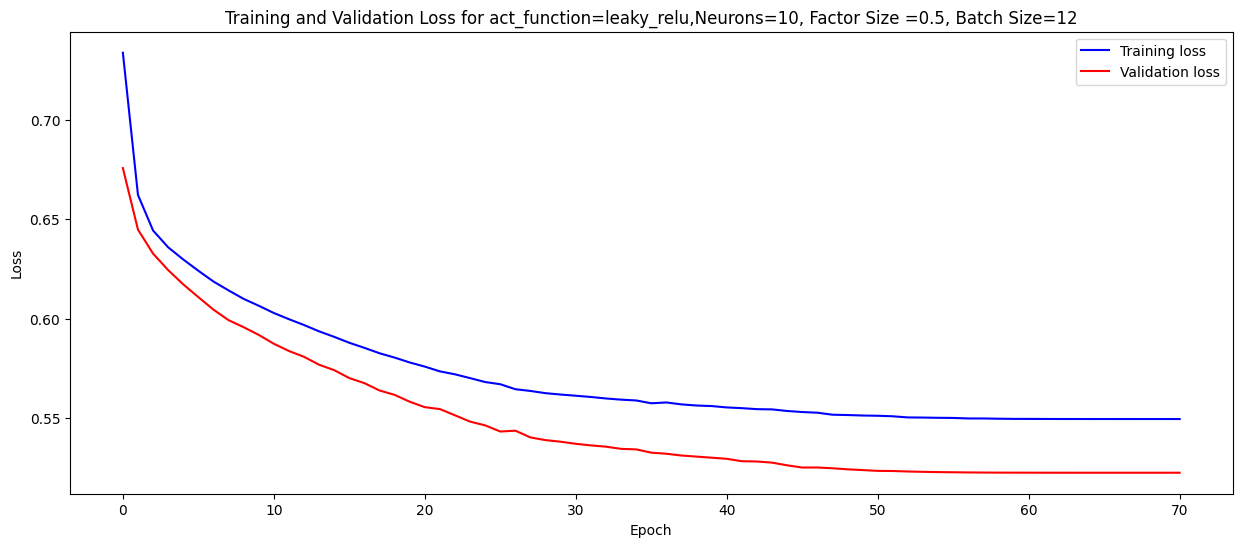

2024-05-04 22:43:01.357684: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 57: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 58: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 60: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 61: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 62: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 63: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 64: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Restoring model weights from the end of the best epoch: 62.

Epoch 65: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Epoch 65: early stopping


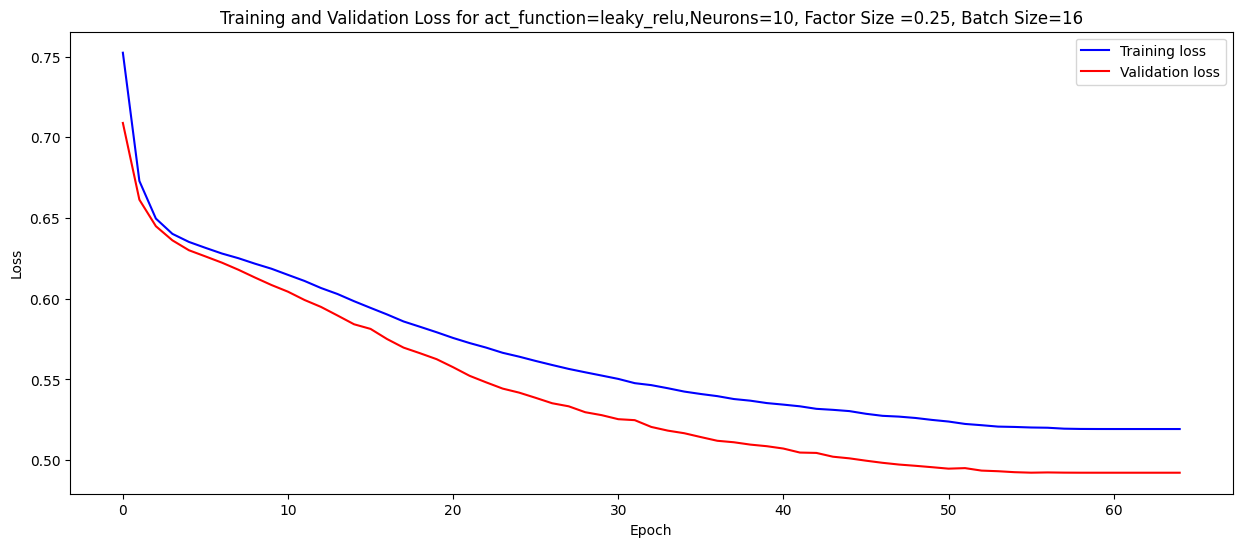

2024-05-04 22:44:13.843479: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 75: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 85: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 87: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 88: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 89: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 90: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 91: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 92: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 93: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 94: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.
Restoring model weights from the end of the best epoch: 92.

Epoch 95: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.


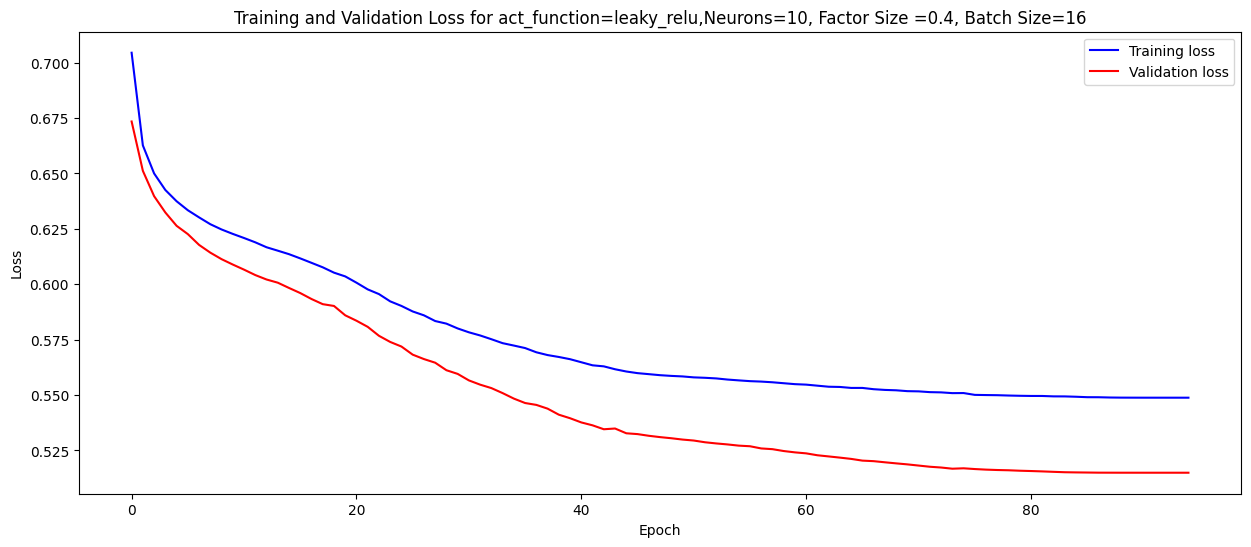

2024-05-04 22:46:04.314385: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 47: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 49: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 50: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 51: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 52: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 53: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 54: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 55: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 56: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 57: ReduceLROnPlateau reducing learning rate to 1.22070

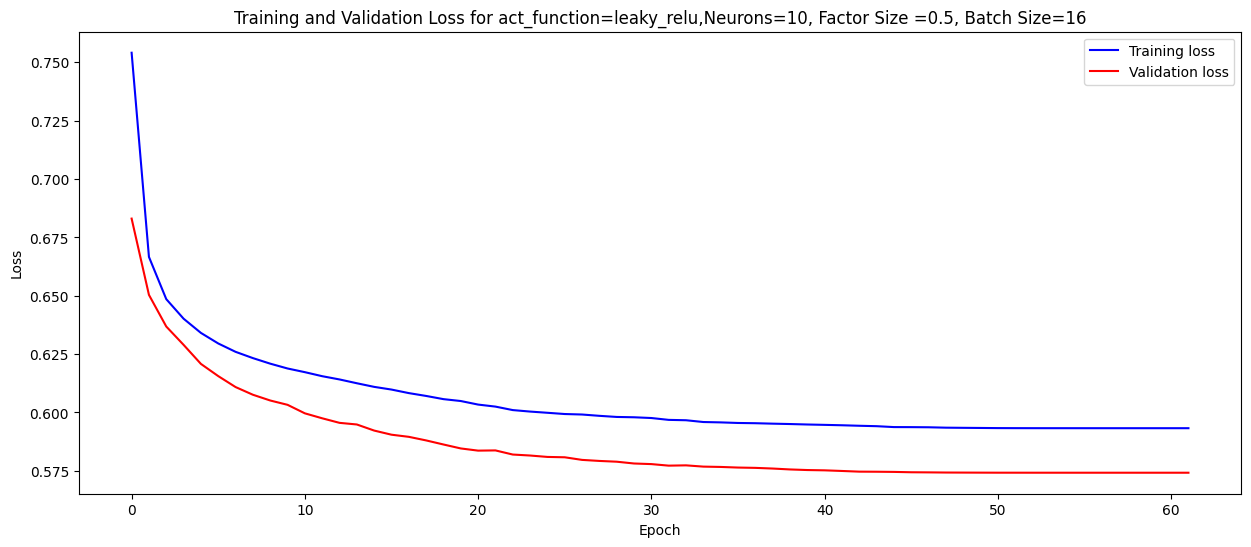

In [14]:
for n in [5, 8, 10]:
        for bs in [10, 12, 16]:
                for f in [0.25, 0.4, 0.5]:
                        create_model('leaky_relu', n, f, bs)

In [20]:
final_model = keras.Sequential()
final_model.add(keras.layers.Dense(units = 8, activation = 'leaky_relu', input_shape = (7,), kernel_initializer = tf.keras.initializers.LecunNormal()))
final_model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.0001, clipnorm=True)
final_model.compile(optimizer = optimiser, loss = 'binary_crossentropy', metrics = 'accuracy', )

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=3, restore_best_weights=True)
rlrnop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=1, verbose=1)

log = final_model.fit(X_train, y_train, validation_data=(X_val_, y_val), epochs=150, batch_size=10, callbacks=[es, rlrnop], verbose=0)

2024-05-04 23:21:51.359145: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.



Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 48: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 56: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 57: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 60: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 61: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 63: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 64: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 65: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 66: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 67: ReduceLROnPlateau reducing learning rate to 6.710

23/23 [==============================] - 0s 2ms/step
Accuracy: 0.6998635743519782
F1 Score: 0.6625766871165644
Recall Score: 0.6467065868263473


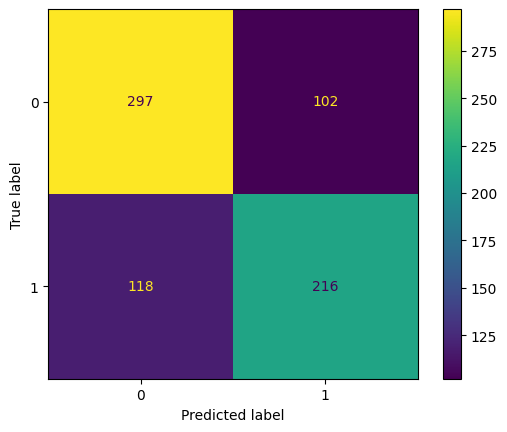

In [21]:
# Scaling the test set
X_test_ = sc.transform(X_test)

# Predicting the Test set results
y_pred = final_model.predict(X_test_)

y_pred = (y_pred > 0.5)

# Accuracy, F1 Score and Recall Score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# disp.ax_.set_title('Confusion Matrix for Simple SVM with RBF Kernel')